# Tema 1 - laborator 2
Simularea variabilelor aleatoare

Ex. 1.

In [3]:
import csv
from faker import Faker

filename = 'test_data.csv'
sample_size = 300

# generarea unui sample de date
with open(filename, mode='w', newline='') as csv_file:
    fake = Faker()
    writer = csv.writer(csv_file)
    writer.writerow(['name'])
    for _ in range(sample_size):
        writer.writerow([fake.name()])


In [2]:
with open(filename, mode='r') as csv_file:
    reader = csv.reader(csv_file)
    data = list(reader)[1:] # skip header

    data = [item[0] for item in data] # turn into 1-D list
    print(data)

['Kim Roberts', 'Joshua Ponce', 'Shari Wood', 'James Simpson', 'Julie Smith', 'Daniel Martinez', 'Danielle Espinoza', 'John Lee', 'Toni Johnson', 'Amanda Reed', 'Molly Green', 'Casey Torres', 'Robert Gonzalez', 'Karen Nguyen', 'Nicholas Houston', 'Brandon Gutierrez PhD', 'Vicki Young', 'Daniel Mitchell', 'Allison Mills', 'Jennifer Johnson', 'Alexa Newton', 'Shannon Mccormick', 'Jasmin Francis', 'Justin Lucas', 'Robert Michael', 'Steven Blackburn', 'Rebecca Simpson', 'Bradley Powell', 'Blake Burns', 'Alexandria Baker']


In [17]:
import numpy as np

sample_size = np.random.randint(len(data))
print(f'Dimensiunea eșantionului: {sample_size}')

random_sample = np.random.choice(data, sample_size, replace=False)
print(random_sample)

Dimensiunea eșantionului: 24
['Brandon Gutierrez PhD' 'Amanda Reed' 'Steven Blackburn' 'James Simpson'
 'Vicki Young' 'Justin Lucas' 'Karen Nguyen' 'Robert Michael'
 'Robert Gonzalez' 'Casey Torres' 'Julie Smith' 'Joshua Ponce'
 'Toni Johnson' 'Rebecca Simpson' 'Alexandria Baker' 'Allison Mills'
 'Shannon Mccormick' 'Molly Green' 'John Lee' 'Jennifer Johnson'
 'Alexa Newton' 'Kim Roberts' 'Jasmin Francis' 'Bradley Powell']


Ex. 2.

a) N≥1 urmează o distribuție geometrică, deoarece aruncările monedei sunt evenimente independente între ele.  
În cazul de față, distribuția va arăta astfel:  
$$P(N = k) = \left(\frac{1}{2}\right)^{k-1}$$  
, unde $k$ este numărul de pași.



b)

In [26]:
def coin_toss():
    return np.random.choice(['Heads', 'Tails'])

def dice_roll():
    return np.random.randint(1, 7)

def simulate_game():
    N = 0
    S = 0.
    while True:
        N += 1
        if coin_toss() == 'Heads':
            S -= 0.5
        else:
            S += dice_roll() - 3
            break
    return N, S

N, S = simulate_game()
print(f'Numărul de pași ai jocului: {N}')
print(f'Suma totală pe care cel de-al doilea jucător trebuie să i-o dea primului: {S}')


Numărul de pași ai jocului: 1
Suma totală pe care cel de-al doilea jucător trebuie să i-o dea primului: 2.0


c)

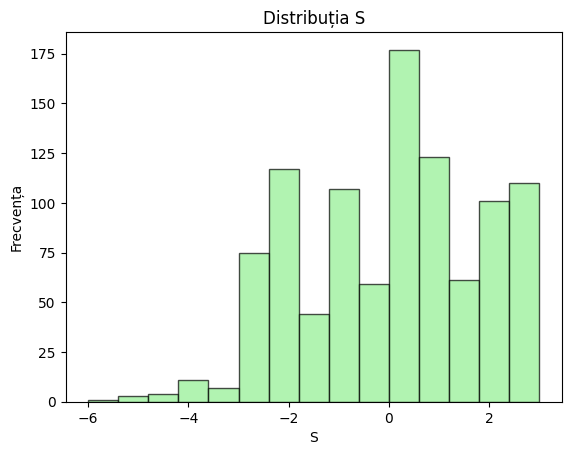

Media lui S: 0.0115


In [29]:
import matplotlib.pyplot as plt

number_of_simulations = 1000

S_results = [simulate_game()[1] for _ in range(number_of_simulations)]

plt.hist(S_results, bins=15, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Distribuția S')
plt.xlabel('S')
plt.ylabel('Frecvența')
plt.show()

print(f'Media lui S: {np.mean(S_results)}')



d)

In [30]:
def counterfeit_coin_toss(p_tails):
    return np.random.choice(['Heads', 'Tails'], p=[1-p_tails, p_tails])

def simulate_wicked_game(p_tails):
    N = 0
    S = 0.
    while True:
        N += 1
        if counterfeit_coin_toss(p_tails) == 'Heads':
            S -= 0.5
        else:
            S += dice_roll() - 3
            break
    return N, S

Probabilitate de apariţie a stemei  
p = 0.3

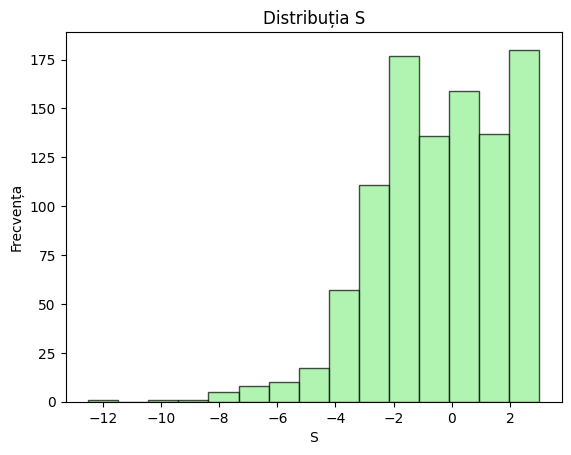

Media lui S: -0.564


In [31]:
number_of_simulations = 1000

S_results = [simulate_wicked_game(p_tails=0.3)[1] for _ in range(number_of_simulations)]

plt.hist(S_results, bins=15, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Distribuția S')
plt.xlabel('S')
plt.ylabel('Frecvența')
plt.show()

print(f'Media lui S: {np.mean(S_results)}')

Probabilitate de apariţie a stemei  
p = 0.7

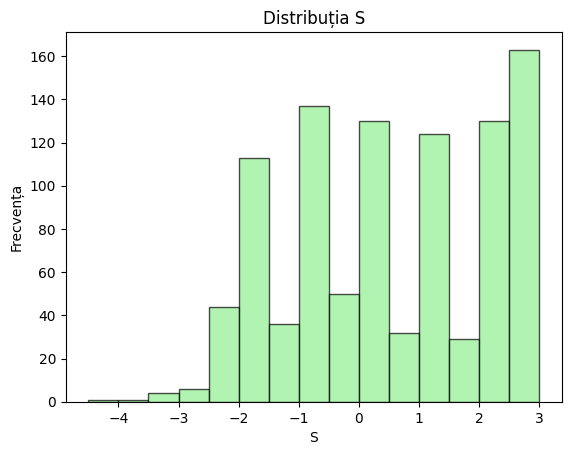

Media lui S: 0.3235


In [32]:
number_of_simulations = 1000

S_results = [simulate_wicked_game(p_tails=0.7)[1] for _ in range(number_of_simulations)]

plt.hist(S_results, bins=15, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Distribuția S')
plt.xlabel('S')
plt.ylabel('Frecvența')
plt.show()

print(f'Media lui S: {np.mean(S_results)}')

Observăm că atunci când moneda este măsluită în favoarea stemei, primul jucător are de câștigat.  
Viceversa, al doilea jucător va avea de câștigat.

Ex. 3.

Observăm că, în total, cei 3 frizeri au împreună o viteză medie de 13 clienți pe oră. Asftel, se explică probabilitățile de preluare a unui client de către un anumit frizer:  
$$ P_1 = \frac{\lambda_1}{\lambda_t} = \frac{3}{h} \cdot \frac{h}{13} = \frac{3}{13},$$
$$ P_2 = \frac{\lambda_2}{\lambda_t} = \frac{6}{h} \cdot \frac{h}{13} = \frac{6}{13},$$
$$ P_3 = \frac{\lambda_3}{\lambda_t} = \frac{4}{h} \cdot \frac{h}{13} = \frac{4}{13},$$
unde $\lambda_t$ este viteză totală a celor 3 frizeri.


In [33]:
lambdas = [3, 6, 4]
p = [3/13, 6/13, 4/13]

N = 10_000

X = np.array([])
for _ in range(N):
    barber = np.random.choice([0, 1, 2], p=p) # select a barber
    service_time = np.random.exponential(1/lambdas[barber])
    X = np.append(X, service_time)

mean_X = np.mean(X)
print(f'Media lui X: {mean_X}h')

std_X = np.std(X)
print(f'Deviația standard a lui X: {std_X}h')

Media lui X: 0.23073322249131015h
Deviația standard a lui X: 0.2531969383403811h


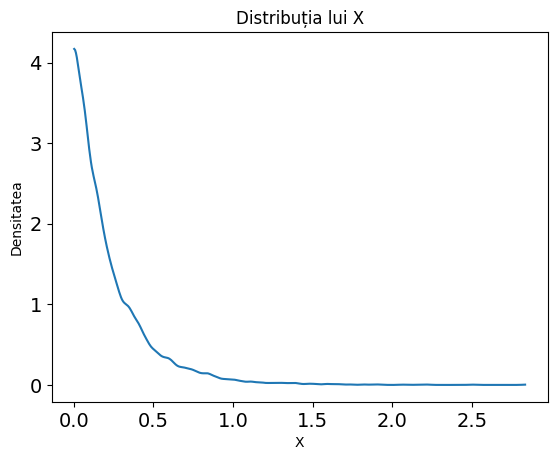

In [11]:
import arviz as az

az.plot_kde(X)
plt.title('Distribuția X')
plt.xlabel('X')
plt.ylabel('Densitatea')
plt.show()